## Instructions:

Use the starter code file to complete the steps that the instructions outline. The steps for this Challenge are divided into the following sections:

* Establish a Baseline Performance

* Tune the Baseline Trading Algorithm

* Evaluate a New Machine Learning Classifier

* Create an Evaluation Report

#### Establish a Baseline Performance

In this section, you’ll run the provided starter code to establish a baseline performance for the trading algorithm. To do so, complete the following steps.

Open the Jupyter notebook. Restart the kernel, run the provided cells that correspond with the first three steps, and then proceed to step four. 

1. Import the OHLCV dataset into a Pandas DataFrame.

2. Generate trading signals using short- and long-window SMA values. 

3. Split the data into training and testing datasets.

4. Use the `SVC` classifier model from SKLearn's support vector machine (SVM) learning method to fit the training data and make predictions based on the testing data. Review the predictions.

5. Review the classification report associated with the `SVC` model predictions. 

6. Create a predictions DataFrame that contains columns for “Predicted” values, “Actual Returns”, and “Strategy Returns”.

7. Create a cumulative return plot that shows the actual returns vs. the strategy returns. Save a PNG image of this plot. This will serve as a baseline against which to compare the effects of tuning the trading algorithm.

8. Write your conclusions about the performance of the baseline trading algorithm in the `README.md` file that’s associated with your GitHub repository. Support your findings by using the PNG image that you saved in the previous step.

#### Tune the Baseline Trading Algorithm

In this section, you’ll tune, or adjust, the model’s input features to find the parameters that result in the best trading outcomes. (You’ll choose the best by comparing the cumulative products of the strategy returns.) To do so, complete the following steps:

1. Tune the training algorithm by adjusting the size of the training dataset. To do so, slice your data into different periods. Rerun the notebook with the updated parameters, and record the results in your `README.md` file. Answer the following question: What impact resulted from increasing or decreasing the training window?

> **Hint** To adjust the size of the training dataset, you can use a different `DateOffset` value&mdash;for example, six months. Be aware that changing the size of the training dataset also affects the size of the testing dataset.

2. Tune the trading algorithm by adjusting the SMA input features. Adjust one or both of the windows for the algorithm. Rerun the notebook with the updated parameters, and record the results in your `README.md` file. Answer the following question: What impact resulted from increasing or decreasing either or both of the SMA windows?

3. Choose the set of parameters that best improved the trading algorithm returns. Save a PNG image of the cumulative product of the actual returns vs. the strategy returns, and document your conclusion in your `README.md` file.

#### Evaluate a New Machine Learning Classifier

In this section, you’ll use the original parameters that the starter code provided. But, you’ll apply them to the performance of a second machine learning model. To do so, complete the following steps:

1. Import a new classifier, such as `AdaBoost`, `DecisionTreeClassifier`, or `LogisticRegression`. (For the full list of classifiers, refer to the [Supervised learning page](https://scikit-learn.org/stable/supervised_learning.html) in the scikit-learn documentation.)

2. Using the original training data as the baseline model, fit another model with the new classifier.

3. Backtest the new model to evaluate its performance. Save a PNG image of the cumulative product of the actual returns vs. the strategy returns for this updated trading algorithm, and write your conclusions in your `README.md` file. Answer the following questions: Did this new model perform better or worse than the provided baseline model? Did this new model perform better or worse than your tuned trading algorithm?

#### Create an Evaluation Report

In the previous sections, you updated your `README.md` file with your conclusions. To accomplish this section, you need to add a summary evaluation report at the end of the `README.md` file. For this report, express your final conclusions and analysis. Support your findings by using the PNG images that you created.


In [16]:
# Imports
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
from finta import TA
import yfinance as yf
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report

In [56]:
def NVDA_Data(start):
    NVDA = yf.download("NVDA", start = start)
    return NVDA
NVDA_df = NVDA_Data("2020-04-11")
NVDA_df["Close"] = NVDA_df["Adj Close"]
NVDA_df = NVDA_df.drop(columns="Adj Close")
NVDA_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2020-04-13,65.137497,67.550003,64.250000,67.321365,39840800
2020-04-14,68.750000,71.330002,68.472504,70.838989,53094800
2020-04-15,69.300003,71.042503,68.845001,70.063118,36614800
2020-04-16,71.769997,74.750000,71.637497,73.520874,74562000
2020-04-17,74.500000,74.714996,71.735001,72.927124,53912000
...,...,...,...,...,...
2022-04-06,249.339996,253.000000,240.029999,244.070007,70383300
2022-04-07,244.410004,247.220001,234.779999,242.080002,55799200
2022-04-08,239.169998,239.229996,230.619995,231.190002,52409100


In [54]:
def Classification_Conditions():
    NVDA_signals_df = NVDA_df.copy()
    NVDA_signals_df["closeReturn"] = NVDA_signals_df["Close"].pct_change()
    NVDA_signals_df["highReturn"] = NVDA_signals_df["High"].pct_change()
    NVDA_signals_df["lowReturn"] = NVDA_signals_df["Low"].pct_change()
    NVDA_signals_df["dailyChange"] = (NVDA_signals_df["Close"] - NVDA_signals_df["Open"]) / NVDA_signals_df["Open"]
    NVDA_signals_df["priceDirection"] = (NVDA_signals_df["Close"].shift(-1) - NVDA_signals_df["Close"])
    NVDA_signals_df = NVDA_signals_df.replace([np.inf, -np.inf], np.nan)
    NVDA_signals_df["Signal"] = 0.0
    NVDA_signals_df["Signal"] = np.where((NVDA_signals_df.loc[:, "priceDirection"] > 0), 1.0, 0.0)
    NVDA_signals_df.drop(columns = ["Open", "High", "Low", "Close", "Volume", "priceDirection"], axis = 1, inplace = True)
    NVDA_signals_df.dropna(inplace = True)
    return NVDA_signals_df
NVDA_signals_df = Classification_Conditions()
NVDA_signals_df

,closeReturn,highReturn,lowReturn,dailyChange,Signal
Date,,,,,
2020-04-14,0.052251,0.055959,0.065720,0.030385,0.0
2020-04-15,-0.010953,-0.004031,0.005440,0.011012,1.0
2020-04-16,0.049352,0.052187,0.040562,0.024396,0.0
2020-04-17,-0.008076,-0.000468,0.001361,-0.021113,0.0
2020-04-20,-0.018028,-0.017935,-0.005820,-0.002752,0.0
...,...,...,...,...,...
2022-04-06,-0.058771,-0.073905,-0.070372,-0.021136,0.0
2022-04-07,-0.008153,-0.022846,-0.021872,-0.009533,0.0
2022-04-08,-0.044985,-0.032319,-0.017719,-0.033365,0.0


In [55]:
def features():
    X = NVDA_signals_df.drop( columns = ["Signal"], axis = 1)
    y = NVDA_signals_df.Signal
    return X, y
X, y = features()

---

## Establish a Baseline Performance

In this section, you’ll run the provided starter code to establish a baseline performance for the trading algorithm. To do so, complete the following steps.

Open the Jupyter notebook. Restart the kernel, run the provided cells that correspond with the first three steps, and then proceed to step four. 


### Step 1: Import the OHLCV dataset into a Pandas DataFrame.

In [2]:
# Import the OHLCV dataset into a Pandas Dataframe
NVDA_df = pd.read_csv(
    Path("NVDA.csv"), 
    index_col='Date', 
    infer_datetime_format=True, 
    parse_dates=True
)

# Review the DataFrame
NVDA_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-04-06,25.059999,25.312500,24.602501,25.190001,63512000
2017-04-07,25.254999,25.432501,24.930000,25.082500,42906800
2017-04-10,25.090000,25.157499,24.400000,24.442499,75633200
2017-04-11,24.137501,24.725000,24.087500,24.530001,61814800
2017-04-12,24.530001,24.674999,24.275000,24.327499,41409200


In [57]:
NVDA_df.Close.hvplot()

:Curve   [Date]   (Close)

In [58]:
# Create a signals_df DataFrame that is a copy of the NVDA Dataframe
NVDA_signals_df = NVDA_df.copy()

# Set the short window and long windows
short_window = 20
long_window = 60

# Add the DEMA technical indicators for the short and long windows
# calculation from the finta library
NVDA_signals_df["Short"] = TA.DEMA(NVDA_signals_df, short_window)
NVDA_signals_df["Long"] = TA.DEMA(NVDA_signals_df, long_window)

# Review the DataFrame
NVDA_signals_df

,Open,High,Low,Close,Volume,Short,Long
Date,,,,,,,
2020-04-13,65.137497,67.550003,64.250000,67.321365,39840800,67.321365,67.321365
2020-04-14,68.750000,71.330002,68.472504,70.838989,53094800,70.045325,69.988653
2020-04-15,69.300003,71.042503,68.845001,70.063118,36614800,70.259823,70.229656
2020-04-16,71.769997,74.750000,71.637497,73.520874,74562000,72.027574,71.884730
2020-04-17,74.500000,74.714996,71.735001,72.927124,53912000,72.661195,72.513229
...,...,...,...,...,...,...,...
2022-04-06,249.339996,253.000000,240.029999,244.070007,70383300,267.970744,255.064933
2022-04-07,244.410004,247.220001,234.779999,242.080002,55799200,263.973055,254.209720
2022-04-08,239.169998,239.229996,230.619995,231.190002,52409100,258.526484,252.694236


In [59]:
 # Set the Signal column
NVDA_signals_df["NVDA Signal"] = 0.0

# Generate the trading signal 1 or 0,
# where 1 is when the Short window is greater than (or crosses over) the Long Window
# where 0 is when the Short window is under the Long window
NVDA_signals_df["NVDA Signal"][short_window:] = np.where(
    NVDA_signals_df["Short"][short_window:] > NVDA_signals_df["Long"][short_window:], 1.0, 0.0
)

# Calculate the points in time at which a position should be taken, 1 or -1
NVDA_signals_df["NVDA Entry/Exit"] = NVDA_signals_df["NVDA Signal"].diff()

# Review the DataFrame
NVDA_signals_df

,Open,High,Low,Close,Volume,Short,Long,NVDA Signal,NVDA Entry/Exit
Date,,,,,,,,,
2020-04-13,65.137497,67.550003,64.250000,67.321365,39840800,67.321365,67.321365,0.0,NaN
2020-04-14,68.750000,71.330002,68.472504,70.838989,53094800,70.045325,69.988653,0.0,0.0
2020-04-15,69.300003,71.042503,68.845001,70.063118,36614800,70.259823,70.229656,0.0,0.0
2020-04-16,71.769997,74.750000,71.637497,73.520874,74562000,72.027574,71.884730,0.0,0.0
2020-04-17,74.500000,74.714996,71.735001,72.927124,53912000,72.661195,72.513229,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2022-04-06,249.339996,253.000000,240.029999,244.070007,70383300,267.970744,255.064933,1.0,0.0
2022-04-07,244.410004,247.220001,234.779999,242.080002,55799200,263.973055,254.209720,1.0,0.0
2022-04-08,239.169998,239.229996,230.619995,231.190002,52409100,258.526484,252.694236,1.0,0.0


In [60]:
# Visualize entry position relative to close price
entry = NVDA_signals_df[NVDA_signals_df["NVDA Entry/Exit"] == 1.0]["Close"].hvplot.scatter(
    color='purple',
    marker='^',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize exit position relative to close price
exit = NVDA_signals_df[NVDA_signals_df["NVDA Entry/Exit"] == -1.0]["Close"].hvplot.scatter(
    color='orange',
    marker='v',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize close price for the investment
security_close = NVDA_signals_df[["Close"]].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize moving averages
moving_avgs = NVDA_signals_df[["Short", "Long"]].hvplot(
    ylabel='Price in $',
    width=1000,
    height=400
)

# Overlay plots
entry_exit_plot = security_close * moving_avgs * entry * exit
entry_exit_plot

:Overlay
   .Curve.I          :Curve   [Date]   (Close)
   .NdOverlay.I      :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)

In [61]:
# Create a new clean copy of the signals_df DataFrame
NVDA_bb_signals_df = NVDA_signals_df.copy()

# Review the DataFrame
NVDA_bb_signals_df

,Open,High,Low,Close,Volume,Short,Long,NVDA Signal,NVDA Entry/Exit
Date,,,,,,,,,
2020-04-13,65.137497,67.550003,64.250000,67.321365,39840800,67.321365,67.321365,0.0,NaN
2020-04-14,68.750000,71.330002,68.472504,70.838989,53094800,70.045325,69.988653,0.0,0.0
2020-04-15,69.300003,71.042503,68.845001,70.063118,36614800,70.259823,70.229656,0.0,0.0
2020-04-16,71.769997,74.750000,71.637497,73.520874,74562000,72.027574,71.884730,0.0,0.0
2020-04-17,74.500000,74.714996,71.735001,72.927124,53912000,72.661195,72.513229,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2022-04-06,249.339996,253.000000,240.029999,244.070007,70383300,267.970744,255.064933,1.0,0.0
2022-04-07,244.410004,247.220001,234.779999,242.080002,55799200,263.973055,254.209720,1.0,0.0
2022-04-08,239.169998,239.229996,230.619995,231.190002,52409100,258.526484,252.694236,1.0,0.0


In [62]:
# Determine the Bollinger Bands for the Dataset
NVDA_bbands_df = TA.BBANDS(NVDA_bb_signals_df)

# Review the DataFrame
NVDA_bbands_df

,BB_UPPER,BB_MIDDLE,BB_LOWER
Date,,,
2020-04-13,NaN,NaN,NaN
2020-04-14,NaN,NaN,NaN
2020-04-15,NaN,NaN,NaN
2020-04-16,NaN,NaN,NaN
2020-04-17,NaN,NaN,NaN
...,...,...,...
2022-04-06,301.478387,257.885500,214.292612
2022-04-07,300.422687,258.660500,216.898313
2022-04-08,299.210780,259.170000,219.129219


In [63]:
# Concatenate the Bollinger Bands to the DataFrame
NVDA_bb_signals_df = pd.concat([NVDA_bb_signals_df, NVDA_bbands_df], axis=1)

# Review the DataFrame
NVDA_bb_signals_df

,Open,High,Low,Close,Volume,Short,Long,NVDA Signal,NVDA Entry/Exit,BB_UPPER,BB_MIDDLE,BB_LOWER
Date,,,,,,,,,,,,
2020-04-13,65.137497,67.550003,64.250000,67.321365,39840800,67.321365,67.321365,0.0,NaN,NaN,NaN,NaN
2020-04-14,68.750000,71.330002,68.472504,70.838989,53094800,70.045325,69.988653,0.0,0.0,NaN,NaN,NaN
2020-04-15,69.300003,71.042503,68.845001,70.063118,36614800,70.259823,70.229656,0.0,0.0,NaN,NaN,NaN
2020-04-16,71.769997,74.750000,71.637497,73.520874,74562000,72.027574,71.884730,0.0,0.0,NaN,NaN,NaN
2020-04-17,74.500000,74.714996,71.735001,72.927124,53912000,72.661195,72.513229,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-06,249.339996,253.000000,240.029999,244.070007,70383300,267.970744,255.064933,1.0,0.0,301.478387,257.885500,214.292612
2022-04-07,244.410004,247.220001,234.779999,242.080002,55799200,263.973055,254.209720,1.0,0.0,300.422687,258.660500,216.898313
2022-04-08,239.169998,239.229996,230.619995,231.190002,52409100,258.526484,252.694236,1.0,0.0,299.210780,259.170000,219.129219


In [64]:
 # Visualize close price for the investment
NVDA_security_close = NVDA_bb_signals_df[["Close"]].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)

NVDA_bb_upper = NVDA_bb_signals_df[["BB_UPPER"]].hvplot(
    line_color='red',
    ylabel='Price in $',
    width=1000,
    height=400
)


NVDA_bb_middle = NVDA_bb_signals_df[["BB_MIDDLE"]].hvplot(
    line_color='orange',
    ylabel='Price in $',
    width=1000,
    height=400
)

NVDA_bb_lower = NVDA_bb_signals_df[["BB_LOWER"]].hvplot(
    line_color='green',
    ylabel='Price in $',
    width=1000,
    height=400
)


# Overlay plots
NVDA_bbands_plot = NVDA_security_close * NVDA_bb_upper * NVDA_bb_middle * NVDA_bb_lower
NVDA_bbands_plot

:Overlay
   .Curve.I   :Curve   [Date]   (Close)
   .Curve.II  :Curve   [Date]   (BB_UPPER)
   .Curve.III :Curve   [Date]   (BB_MIDDLE)
   .Curve.IV  :Curve   [Date]   (BB_LOWER)

In [65]:
# Create a trading algorithm using Bollinger Bands
# Set the Signal column
NVDA_bb_signals_df["NVDA Signal"] = 0.0

# Generate the trading signals 1 (entry) or -1 (exit) for a long position trading algorithm
# where 1 is when the Close price is less than the BB_LOWER window
# where -1 is when the Close price is greater the the BB_UPPER window
for index, row in NVDA_bb_signals_df.iterrows():
    if row["Close"] < row["BB_LOWER"]:
        NVDA_bb_signals_df.loc[index, "NVDA Signal"] = 1.0
    if row["Close"] > row["BB_UPPER"]:
        NVDA_bb_signals_df.loc[index,"NVDA Signal"] = -1.0

# Review the DataFrame
NVDA_bb_signals_df

,Open,High,Low,Close,Volume,Short,Long,NVDA Signal,NVDA Entry/Exit,BB_UPPER,BB_MIDDLE,BB_LOWER
Date,,,,,,,,,,,,
2020-04-13,65.137497,67.550003,64.250000,67.321365,39840800,67.321365,67.321365,0.0,NaN,NaN,NaN,NaN
2020-04-14,68.750000,71.330002,68.472504,70.838989,53094800,70.045325,69.988653,0.0,0.0,NaN,NaN,NaN
2020-04-15,69.300003,71.042503,68.845001,70.063118,36614800,70.259823,70.229656,0.0,0.0,NaN,NaN,NaN
2020-04-16,71.769997,74.750000,71.637497,73.520874,74562000,72.027574,71.884730,0.0,0.0,NaN,NaN,NaN
2020-04-17,74.500000,74.714996,71.735001,72.927124,53912000,72.661195,72.513229,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-06,249.339996,253.000000,240.029999,244.070007,70383300,267.970744,255.064933,0.0,0.0,301.478387,257.885500,214.292612
2022-04-07,244.410004,247.220001,234.779999,242.080002,55799200,263.973055,254.209720,0.0,0.0,300.422687,258.660500,216.898313
2022-04-08,239.169998,239.229996,230.619995,231.190002,52409100,258.526484,252.694236,0.0,0.0,299.210780,259.170000,219.129219


In [66]:
# Visualize entry position relative to close price
NVDA_entry = NVDA_bb_signals_df[NVDA_bb_signals_df["NVDA Signal"] == 1.0]["Close"].hvplot.scatter(
    color='green',
    marker='^',
    size=200,
    legend=True,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize exit position relative to close price
NVDA_exit = NVDA_bb_signals_df[NVDA_bb_signals_df["NVDA Signal"] == -1.0]["Close"].hvplot.scatter(
    color='red',
    marker='v',
    size=200,
    legend=True,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize close price for the investment
NVDA_security_close = NVDA_bb_signals_df[["Close"]].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    legend=True,
    width=1000,
    height=400
)

NVDA_bb_upper = NVDA_bb_signals_df[["BB_UPPER"]].hvplot(
    line_color='red',
    ylabel='Price in $',
    legend=True,
    width=1000,
    height=400
)


NVDA_bb_middle = NVDA_bb_signals_df[["BB_MIDDLE"]].hvplot(
    line_color='orange',
    ylabel='Price in $',
    legend=True,
    width=1000,
    height=400
)

NVDA_bb_lower = NVDA_bb_signals_df[["BB_LOWER"]].hvplot(
    line_color='green',
    ylabel='Price in $',
    legend=True,
    width=1000,
    height=400
)


# Overlay plots
NVDA_bbands_plot = NVDA_security_close * NVDA_bb_upper * NVDA_bb_middle * NVDA_bb_lower * entry * exit
NVDA_bbands_plot

:Overlay
   .Curve.I          :Curve   [Date]   (Close)
   .Curve.II         :Curve   [Date]   (BB_UPPER)
   .Curve.III        :Curve   [Date]   (BB_MIDDLE)
   .Curve.IV         :Curve   [Date]   (BB_LOWER)
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)

In [67]:
# Update the trading algorithm using Bollinger Bands

# Set the Signal column
NVDA_bb_signals_df["NVDA Signal"] = 0.0

# Create a value to hold the initial trade signal
NVDA_trade_signal = 0

# Update the DataFrame Signal column 1 (entry) or -1 (exit) for a long position trading algorithm
# where 1 is when the Close price is less than the BB_LOWER window
# where -1 is when the Close price is greater the the BB_UPPER window
# Incorporate a conditional in the if-statement, to evaluate the value of the trade_signal so the algorithm 
# plots only 1 entry and exit point per cycle.
for index, row in NVDA_bb_signals_df.iterrows():
    if (row["Close"] < row["BB_LOWER"]) and (NVDA_trade_signal < 1):
        NVDA_bb_signals_df.loc[index, "NVDA Signal"] = 1.0
        NVDA_trade_signal += 1
        
    if (row["Close"] > row["BB_UPPER"]) and (NVDA_trade_signal > 0):
        NVDA_bb_signals_df.loc[index, "NVDA Signal"] = -1.0
        NVDA_trade_signal = 0


# Review the DataFrame
NVDA_bb_signals_df

,Open,High,Low,Close,Volume,Short,Long,NVDA Signal,NVDA Entry/Exit,BB_UPPER,BB_MIDDLE,BB_LOWER
Date,,,,,,,,,,,,
2020-04-13,65.137497,67.550003,64.250000,67.321365,39840800,67.321365,67.321365,0.0,NaN,NaN,NaN,NaN
2020-04-14,68.750000,71.330002,68.472504,70.838989,53094800,70.045325,69.988653,0.0,0.0,NaN,NaN,NaN
2020-04-15,69.300003,71.042503,68.845001,70.063118,36614800,70.259823,70.229656,0.0,0.0,NaN,NaN,NaN
2020-04-16,71.769997,74.750000,71.637497,73.520874,74562000,72.027574,71.884730,0.0,0.0,NaN,NaN,NaN
2020-04-17,74.500000,74.714996,71.735001,72.927124,53912000,72.661195,72.513229,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-06,249.339996,253.000000,240.029999,244.070007,70383300,267.970744,255.064933,0.0,0.0,301.478387,257.885500,214.292612
2022-04-07,244.410004,247.220001,234.779999,242.080002,55799200,263.973055,254.209720,0.0,0.0,300.422687,258.660500,216.898313
2022-04-08,239.169998,239.229996,230.619995,231.190002,52409100,258.526484,252.694236,0.0,0.0,299.210780,259.170000,219.129219


In [69]:
# Visualize entry position relative to close price
NVDA_entry = NVDA_bb_signals_df[NVDA_bb_signals_df["NVDA Signal"] == 1.0]["Close"].hvplot.scatter(
    color='green',
    marker='^',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize exit position relative to close price
NVDA_exit = NVDA_bb_signals_df[NVDA_bb_signals_df["NVDA Signal"] == -1.0]["Close"].hvplot.scatter(
    color='red',
    marker='v',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize close price for the investment
NVDA_security_close = NVDA_bb_signals_df[["Close"]].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)

NVDA_bb_upper = NVDA_bb_signals_df[["BB_UPPER"]].hvplot(
    line_color='purple',
    ylabel='Price in $',
    width=1000,
    height=400
)


NVDA_bb_middle = NVDA_bb_signals_df[["BB_MIDDLE"]].hvplot(
    line_color='yellow',
    ylabel='Price in $',
    width=1000,
    height=400
)

NVDA_bb_lower = NVDA_bb_signals_df[["BB_LOWER"]].hvplot(
    line_color='orange',
    ylabel='Price in $',
    width=1000,
    height=400
)


# Overlay plots
NVDA_bbands_plot = NVDA_security_close * NVDA_bb_upper * NVDA_bb_middle * NVDA_bb_lower * NVDA_entry * NVDA_exit
NVDA_bbands_plot

:Overlay
   .Curve.I          :Curve   [Date]   (Close)
   .Curve.II         :Curve   [Date]   (BB_UPPER)
   .Curve.III        :Curve   [Date]   (BB_MIDDLE)
   .Curve.IV         :Curve   [Date]   (BB_LOWER)
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)

In [70]:
# Calculating returns from close prices and adding to the dataframe
NVDA_bb_signals_df["Actual Returns"] = NVDA_bb_signals_df["Close"].pct_change()
NVDA_bb_signals_df

,Open,High,Low,Close,Volume,Short,Long,NVDA Signal,NVDA Entry/Exit,BB_UPPER,BB_MIDDLE,BB_LOWER,Actual Returns
Date,,,,,,,,,,,,,
2020-04-13,65.137497,67.550003,64.250000,67.321365,39840800,67.321365,67.321365,0.0,NaN,NaN,NaN,NaN,NaN
2020-04-14,68.750000,71.330002,68.472504,70.838989,53094800,70.045325,69.988653,0.0,0.0,NaN,NaN,NaN,0.052251
2020-04-15,69.300003,71.042503,68.845001,70.063118,36614800,70.259823,70.229656,0.0,0.0,NaN,NaN,NaN,-0.010953
2020-04-16,71.769997,74.750000,71.637497,73.520874,74562000,72.027574,71.884730,0.0,0.0,NaN,NaN,NaN,0.049352
2020-04-17,74.500000,74.714996,71.735001,72.927124,53912000,72.661195,72.513229,0.0,0.0,NaN,NaN,NaN,-0.008076
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-06,249.339996,253.000000,240.029999,244.070007,70383300,267.970744,255.064933,0.0,0.0,301.478387,257.885500,214.292612,-0.058771
2022-04-07,244.410004,247.220001,234.779999,242.080002,55799200,263.973055,254.209720,0.0,0.0,300.422687,258.660500,216.898313,-0.008153
2022-04-08,239.169998,239.229996,230.619995,231.190002,52409100,258.526484,252.694236,0.0,0.0,299.210780,259.170000,219.129219,-0.044985


In [71]:
# Calculating strategy returns and adding to dataframe
NVDA_bb_signals_df["Strategy Returns"] = NVDA_bb_signals_df["Actual Returns"] * NVDA_bb_signals_df["NVDA Signal"].shift()
NVDA_bb_signals_df

,Open,High,Low,Close,Volume,Short,Long,NVDA Signal,NVDA Entry/Exit,BB_UPPER,BB_MIDDLE,BB_LOWER,Actual Returns,Strategy Returns
Date,,,,,,,,,,,,,,
2020-04-13,65.137497,67.550003,64.250000,67.321365,39840800,67.321365,67.321365,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-14,68.750000,71.330002,68.472504,70.838989,53094800,70.045325,69.988653,0.0,0.0,NaN,NaN,NaN,0.052251,0.000000
2020-04-15,69.300003,71.042503,68.845001,70.063118,36614800,70.259823,70.229656,0.0,0.0,NaN,NaN,NaN,-0.010953,-0.000000
2020-04-16,71.769997,74.750000,71.637497,73.520874,74562000,72.027574,71.884730,0.0,0.0,NaN,NaN,NaN,0.049352,0.000000
2020-04-17,74.500000,74.714996,71.735001,72.927124,53912000,72.661195,72.513229,0.0,0.0,NaN,NaN,NaN,-0.008076,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-06,249.339996,253.000000,240.029999,244.070007,70383300,267.970744,255.064933,0.0,0.0,301.478387,257.885500,214.292612,-0.058771,-0.000000
2022-04-07,244.410004,247.220001,234.779999,242.080002,55799200,263.973055,254.209720,0.0,0.0,300.422687,258.660500,216.898313,-0.008153,-0.000000
2022-04-08,239.169998,239.229996,230.619995,231.190002,52409100,258.526484,252.694236,0.0,0.0,299.210780,259.170000,219.129219,-0.044985,-0.000000


In [72]:
# Examining dataframe
NVDA_bb_signals_df.describe()

,Open,High,Low,Close,Volume,Short,Long,NVDA Signal,NVDA Entry/Exit,BB_UPPER,BB_MIDDLE,BB_LOWER,Actual Returns,Strategy Returns
count,506.000000,506.000000,506.000000,506.000000,5.060000e+02,506.000000,506.000000,506.000000,505.000000,487.000000,487.000000,487.000000,505.000000,505.000000
mean,172.731576,175.915642,169.142456,172.532886,4.175583e+07,172.623680,172.972358,0.001976,0.000000,190.809896,172.940776,155.071656,0.002750,0.000046
std,66.409972,68.043706,64.321041,66.174918,1.941382e+07,66.662620,67.582931,0.147575,0.178174,73.985007,64.016786,55.206804,0.030026,0.002011
min,65.137497,67.550003,64.250000,67.236565,9.788400e+06,67.321365,67.321365,-1.000000,-1.000000,77.491957,72.349828,65.586472,-0.092775,-0.018844
25%,129.158127,130.775631,126.513126,128.490273,2.717730e+07,129.876564,132.688491,0.000000,0.000000,138.455095,131.200067,117.781003,-0.013498,0.000000
50%,145.948746,147.663750,142.495003,144.983711,3.759940e+07,145.360476,142.436613,0.000000,0.000000,160.513712,145.736449,129.463760,0.003060,0.000000
75%,222.757496,225.792496,218.602501,222.304901,5.266165e+07,223.059382,224.496672,0.000000,0.000000,239.187093,221.049603,197.431670,0.020344,0.000000
max,335.170013,346.470001,320.359985,333.662292,1.463684e+08,331.338958,314.544776,1.000000,1.000000,344.239819,313.868494,290.902727,0.120423,0.031441


In [73]:
# Plotting strategy returns
((1 + NVDA_bb_signals_df["Strategy Returns"]).cumprod() -1).hvplot()

:Curve   [Date]   (Strategy Returns)

In [74]:
# Assinging copy of Short and Long columns to a feature dataframe (X)
X = NVDA_bb_signals_df[["BB_UPPER", "BB_LOWER", "Close"]].shift().dropna()

X

,BB_UPPER,BB_LOWER,Close
Date,,,
2020-05-11,77.491957,67.207698,77.961555
2020-05-12,78.772715,67.243431,80.486275
2020-05-13,79.415704,67.302720,77.861771
2020-05-14,79.873308,67.602530,77.637253
2020-05-15,80.835779,67.301672,80.137009
...,...,...,...
2022-04-06,302.135416,212.242582,259.309998
2022-04-07,301.478387,214.292612,244.070007
2022-04-08,300.422687,216.898313,242.080002


In [85]:
# Creating target set by selecting the NVDA Signal column (y)
y = NVDA_bb_signals_df["NVDA Entry/Exit"]

y.value_counts()

 0.0    489
 1.0      8
-1.0      8
Name: NVDA Entry/Exit, dtype: int64

In [86]:
# Selecting start of training period
training_begin = X.index.min()

print(training_begin)

2020-05-11 00:00:00


In [87]:
# Selecting end of the training period 
training_end = X.index.min() + DateOffset(months=18)

print(training_end)

2021-11-11 00:00:00


In [88]:
# Generating the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

X_train

,BB_UPPER,BB_LOWER,Close
Date,,,
2020-05-11,77.491957,67.207698,77.961555
2020-05-12,78.772715,67.243431,80.486275
2020-05-13,79.415704,67.302720,77.861771
2020-05-14,79.873308,67.602530,77.637253
2020-05-15,80.835779,67.301672,80.137009
...,...,...,...
2021-11-05,283.941032,186.167300,297.922760
2021-11-08,294.048810,184.977910,297.432892
2021-11-09,304.803833,184.328927,307.949829


In [89]:
# Generating the X_test and y_test DataFrames
X_test = X.loc[training_end+DateOffset(hours=1):]
y_test = y.loc[training_end+DateOffset(hours=1):]

X_test

,BB_UPPER,BB_LOWER,Close
Date,,,
2021-11-12,322.979828,193.294984,303.811035
2021-11-15,327.495285,197.305032,303.811035
2021-11-16,330.585352,202.015683,300.162109
2021-11-17,332.996232,207.515487,301.941589
2021-11-18,332.786017,214.881605,292.524323
...,...,...,...
2022-04-06,302.135416,212.242582,259.309998
2022-04-07,301.478387,214.292612,244.070007
2022-04-08,300.422687,216.898313,242.080002


In [90]:
# Scaling the features DataFrames

# Creating a Standard Scaler instance 
scaler = StandardScaler()

# Applying the scaler model to fit the X_train data
X_scaler = scaler.fit(X_train)

# Transforming the X_train and X_test dataframes using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [91]:
# From SVM, instantiate SVC classifier model instance
svm_model = svm.SVC()
 
# Fit the model to the data using the training data
svm_model = svm_model.fit(X_train_scaled, y_train)
 
# Use the testing data to make the model predictions
svm_pred = svm_model.predict(X_test_scaled)

# Review the model's predicted values
svm_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [92]:
# Use a classification report to evaluate the model using the predictions and testing data
svm_testing_report = classification_report(y_test, svm_pred)


# Print the classification report
print(svm_testing_report)

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         2
         0.0       0.97      1.00      0.99       101
         1.0       0.00      0.00      0.00         1

    accuracy                           0.97       104
   macro avg       0.32      0.33      0.33       104
weighted avg       0.94      0.97      0.96       104



In [93]:
# Create a new empty predictions DataFrame:

# Create a predictions DataFrame
predictions_df = pd.DataFrame(index=X_test.index)

# Add the SVM model predictions to the DataFrame
predictions_df['Predicted'] = svm_pred

# Add the actual returns to the DataFrame
predictions_df['Actual Returns'] = NVDA_bb_signals_df['Actual Returns']

# Add the strategy returns to the DataFrame
predictions_df['Strategy Returns'] = predictions_df['Actual Returns']*svm_pred

# Review the DataFrame
display(predictions_df)
predictions_df.describe()

,Predicted,Actual Returns,Strategy Returns
Date,,,
2021-11-12,0.0,0.000000,0.0
2021-11-15,0.0,-0.012011,-0.0
2021-11-16,0.0,0.005928,0.0
2021-11-17,0.0,-0.031189,-0.0
2021-11-18,0.0,0.082499,0.0
...,...,...,...
2022-04-06,0.0,-0.058771,-0.0
2022-04-07,0.0,-0.008153,-0.0
2022-04-08,0.0,-0.044985,-0.0


,Predicted,Actual Returns,Strategy Returns
count,104.0,104.000000,104.0
mean,0.0,-0.002524,0.0
std,0.0,0.040219,0.0
min,0.0,-0.075591,-0.0
25%,0.0,-0.033169,0.0
50%,0.0,-0.008004,0.0
75%,0.0,0.017675,0.0
max,0.0,0.098151,-0.0


<AxesSubplot:xlabel='Date'>

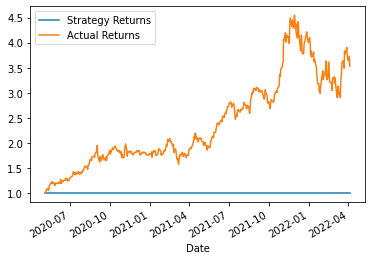

In [31]:
# Plot the actual returns versus the strategy returns
(1 + predictions_df[['Strategy Returns', 'Actual Returns']]).cumprod().plot()

In [ ]:
# From SVM, instantiate SVC classifier model instance
svm_model = svm.SVC()
 
# Fit the model to the data using the training data
svm_model = svm_model.fit(X_train_scaled, y_train)
 
# Use the testing data to make the model predictions
svm_pred = svm_model.predict(X_test_scaled)

# Review the model's predicted values
svm_pred

In [4]:
# Filter the date index and close columns
NVDA_signals_df = NVDA_df.loc[:, ["Close"]]

# Use the pct_change function to generate returns from close prices
signals_df["Actual Returns"] = signals_df["Close"].pct_change()

# Drop all NaN values from the DataFrame
signals_df = signals_df.dropna()

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,Close,Actual Returns
Date,,
2017-04-07,25.082500,-0.004268
2017-04-10,24.442499,-0.025516
2017-04-11,24.530001,0.003580
2017-04-12,24.327499,-0.008255
2017-04-13,23.872499,-0.018703


,Close,Actual Returns
Date,,
2022-03-30,276.899994,-0.033710
2022-03-31,272.859985,-0.014590
2022-04-01,267.119995,-0.021036
2022-04-04,273.600006,0.024259
2022-04-05,259.309998,-0.052230


## Step 2: Generate trading signals using short- and long-window SMA values. 

In [5]:
# Set the short window and long window
short_window = 20
long_window = 50

# Generate the fast and slow simple moving averages (4 and 100 days, respectively)
signals_df['SMA_Fast'] = signals_df['Close'].rolling(window=short_window).mean()
signals_df['SMA_Slow'] = signals_df['Close'].rolling(window=long_window).mean()

signals_df = signals_df.dropna()

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,Close,Actual Returns,SMA_Fast,SMA_Slow
Date,,,,
2017-06-19,39.330002,0.037594,36.752875,31.11710
2017-06-20,39.272499,-0.001462,36.980250,31.40090
2017-06-21,39.867500,0.015151,37.260750,31.70940
2017-06-22,39.592499,-0.006898,37.508250,32.01065
2017-06-23,38.457500,-0.028667,37.702875,32.29325


,Close,Actual Returns,SMA_Fast,SMA_Slow
Date,,,,
2022-03-30,276.899994,-0.033710,248.302500,244.516200
2022-03-31,272.859985,-0.014590,250.088499,244.960000
2022-04-01,267.119995,-0.021036,251.976499,245.472399
2022-04-04,273.600006,0.024259,254.980499,246.269600
2022-04-05,259.309998,-0.052230,257.188999,246.781399


In [6]:
# Initialize the new Signal column
signals_df['Signal'] = 0.0

# When Actual Returns are greater than or equal to 0, generate signal to buy stock long
signals_df.loc[(signals_df['Actual Returns'] >= 0), 'Signal'] = 1

# When Actual Returns are less than 0, generate signal to sell stock short
signals_df.loc[(signals_df['Actual Returns'] < 0), 'Signal'] = -1

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,Close,Actual Returns,SMA_Fast,SMA_Slow,Signal
Date,,,,,
2017-06-19,39.330002,0.037594,36.752875,31.11710,1.0
2017-06-20,39.272499,-0.001462,36.980250,31.40090,-1.0
2017-06-21,39.867500,0.015151,37.260750,31.70940,1.0
2017-06-22,39.592499,-0.006898,37.508250,32.01065,-1.0
2017-06-23,38.457500,-0.028667,37.702875,32.29325,-1.0


,Close,Actual Returns,SMA_Fast,SMA_Slow,Signal
Date,,,,,
2022-03-30,276.899994,-0.033710,248.302500,244.516200,-1.0
2022-03-31,272.859985,-0.014590,250.088499,244.960000,-1.0
2022-04-01,267.119995,-0.021036,251.976499,245.472399,-1.0
2022-04-04,273.600006,0.024259,254.980499,246.269600,1.0
2022-04-05,259.309998,-0.052230,257.188999,246.781399,-1.0


In [7]:
signals_df['Signal'].value_counts()

 1.0    656
-1.0    553
Name: Signal, dtype: int64

In [8]:
# Calculate the strategy returns and add them to the signals_df DataFrame
signals_df['Strategy Returns'] = signals_df['Actual Returns'] * signals_df['Signal'].shift()

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,Close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns
Date,,,,,,
2017-06-19,39.330002,0.037594,36.752875,31.11710,1.0,NaN
2017-06-20,39.272499,-0.001462,36.980250,31.40090,-1.0,-0.001462
2017-06-21,39.867500,0.015151,37.260750,31.70940,1.0,-0.015151
2017-06-22,39.592499,-0.006898,37.508250,32.01065,-1.0,-0.006898
2017-06-23,38.457500,-0.028667,37.702875,32.29325,-1.0,0.028667


,Close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns
Date,,,,,,
2022-03-30,276.899994,-0.033710,248.302500,244.516200,-1.0,-0.033710
2022-03-31,272.859985,-0.014590,250.088499,244.960000,-1.0,0.014590
2022-04-01,267.119995,-0.021036,251.976499,245.472399,-1.0,0.021036
2022-04-04,273.600006,0.024259,254.980499,246.269600,1.0,-0.024259
2022-04-05,259.309998,-0.052230,257.188999,246.781399,-1.0,-0.052230


<AxesSubplot:xlabel='Date'>

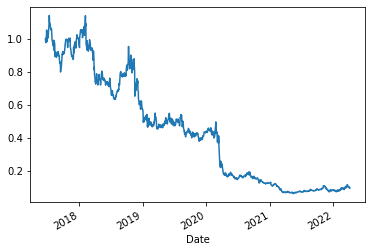

In [9]:
# Plot Strategy Returns to examine performance
(1 + signals_df['Strategy Returns']).cumprod().plot()

### Step 3: Split the data into training and testing datasets.

In [10]:
# Assign a copy of the sma_fast and sma_slow columns to a features DataFrame called X
X = signals_df[['SMA_Fast', 'SMA_Slow']].shift().dropna()

# Review the DataFrame
X.head()

,SMA_Fast,SMA_Slow
Date,,
2017-06-20,36.752875,31.11710
2017-06-21,36.980250,31.40090
2017-06-22,37.260750,31.70940
2017-06-23,37.508250,32.01065
2017-06-26,37.702875,32.29325


In [11]:
# Create the target set selecting the Signal column and assiging it to y
y = signals_df['Signal']

# Review the value counts
y.value_counts()

 1.0    656
-1.0    553
Name: Signal, dtype: int64

In [12]:
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

2017-06-20 00:00:00


In [13]:
# Select the ending period for the training data with an offset of 36 months
training_end = X.index.min() + DateOffset(months=36)

# Display the training end date
print(training_end)

2020-06-20 00:00:00


In [14]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Review the X_train DataFrame
X_train.head()

,SMA_Fast,SMA_Slow
Date,,
2017-06-20,36.752875,31.11710
2017-06-21,36.980250,31.40090
2017-06-22,37.260750,31.70940
2017-06-23,37.508250,32.01065
2017-06-26,37.702875,32.29325


In [15]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end+DateOffset(hours=1):]
y_test = y.loc[training_end+DateOffset(hours=1):]

# Review the X_test DataFrame
X_train.head()

,SMA_Fast,SMA_Slow
Date,,
2017-06-20,36.752875,31.11710
2017-06-21,36.980250,31.40090
2017-06-22,37.260750,31.70940
2017-06-23,37.508250,32.01065
2017-06-26,37.702875,32.29325


In [16]:
# Scale the features DataFrames

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Step 4: Use the `SVC` classifier model from SKLearn's support vector machine (SVM) learning method to fit the training data and make predictions based on the testing data. Review the predictions.

In [17]:
# From SVM, instantiate SVC classifier model instance
svm_model = svm.SVC()
 
# Fit the model to the data using the training data
svm_model = svm_model.fit(X_train_scaled, y_train)
 
# Use the testing data to make the model predictions
svm_pred = svm_model.predict(X_test_scaled)

# Review the model's predicted values
svm_pred


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

### Step 5: Review the classification report associated with the `SVC` model predictions. 

In [18]:
# Use a classification report to evaluate the model using the predictions and testing data
svm_testing_report = classification_report(y_test, svm_pred)

# Print the classification report
print(svm_testing_report)


              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00       202
         1.0       0.55      1.00      0.71       250

    accuracy                           0.55       452
   macro avg       0.28      0.50      0.36       452
weighted avg       0.31      0.55      0.39       452



/Users/timothywardlow/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/timothywardlow/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/timothywardlow/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

### Step 6: Create a predictions DataFrame that contains columns for “Predicted” values, “Actual Returns”, and “Strategy Returns”.

In [ ]:
# Create a new empty predictions DataFrame:

# Create a predictions DataFrame
predictions_df = # YOUR CODE HERE

# Add the SVM model predictions to the DataFrame
predictions_df['Predicted'] = # YOUR CODE HERE

# Add the actual returns to the DataFrame
predictions_df['Actual Returns'] = # YOUR CODE HERE

# Add the strategy returns to the DataFrame
predictions_df['Strategy Returns'] = # YOUR CODE HERE

# Review the DataFrame
display(predictions_df.head())
display(predictions_df.tail())

### Step 7: Create a cumulative return plot that shows the actual returns vs. the strategy returns. Save a PNG image of this plot. This will serve as a baseline against which to compare the effects of tuning the trading algorithm.

In [ ]:
# Plot the actual returns versus the strategy returns
# YOUR CODE HERE


---

## Tune the Baseline Trading Algorithm

In this section, you’ll tune, or adjust, the model’s input features to find the parameters that result in the best trading outcomes. You’ll choose the best by comparing the cumulative products of the strategy returns.

### Step 1: Tune the training algorithm by adjusting the size of the training dataset. 

To do so, slice your data into different periods. Rerun the notebook with the updated parameters, and record the results in your `README.md` file. 

Answer the following question: What impact resulted from increasing or decreasing the training window?

### Step 2: Tune the trading algorithm by adjusting the SMA input features. 

Adjust one or both of the windows for the algorithm. Rerun the notebook with the updated parameters, and record the results in your `README.md` file. 

Answer the following question: What impact resulted from increasing or decreasing either or both of the SMA windows?

### Step 3: Choose the set of parameters that best improved the trading algorithm returns. 

Save a PNG image of the cumulative product of the actual returns vs. the strategy returns, and document your conclusion in your `README.md` file.

---

## Evaluate a New Machine Learning Classifier

In this section, you’ll use the original parameters that the starter code provided. But, you’ll apply them to the performance of a second machine learning model. 

### Step 1:  Import a new classifier, such as `AdaBoost`, `DecisionTreeClassifier`, or `LogisticRegression`. (For the full list of classifiers, refer to the [Supervised learning page](https://scikit-learn.org/stable/supervised_learning.html) in the scikit-learn documentation.)

In [ ]:
# Import a new classifier from SKLearn
# YOUR CODE HERE

# Initiate the model instance
# YOUR CODE HERE


### Step 2: Using the original training data as the baseline model, fit another model with the new classifier.

In [ ]:
# Fit the model using the training data
model = # YOUR CODE HERE

# Use the testing dataset to generate the predictions for the new model
pred = # YOUR CODE HERE

# Review the model's predicted values
# YOUR CODE HERE


### Step 3: Backtest the new model to evaluate its performance. 

Save a PNG image of the cumulative product of the actual returns vs. the strategy returns for this updated trading algorithm, and write your conclusions in your `README.md` file. 

Answer the following questions: 
Did this new model perform better or worse than the provided baseline model? 
Did this new model perform better or worse than your tuned trading algorithm?

In [ ]:
# Use a classification report to evaluate the model using the predictions and testing data
# YOUR CODE HERE

# Print the classification report
# YOUR CODE HERE


In [ ]:
# Create a new empty predictions DataFrame:

# Create a predictions DataFrame
# YOUR CODE HERE

# Add the SVM model predictions to the DataFrame
# YOUR CODE HERE

# Add the actual returns to the DataFrame
# YOUR CODE HERE

# Add the strategy returns to the DataFrame
# YOUR CODE HERE

# Review the DataFrame
# YOUR CODE HERE


In [ ]:
# Plot the actual returns versus the strategy returns
# YOUR CODE HERE